In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
from datetime import date
import scipy.stats as st
from requests.utils import requote_uri

In [31]:
from api_key import api_key
#np.random.seed(2)

In [32]:
# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [33]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))



609


In [35]:
url = "api.openweathermap.org/data/2.5/weather?q="
city_list=[]
temp=[]
humidity=[]
cloudiness=[]
wind_speed=[]
lat=[]
long=[]
country = []
date=[]
record = 0

for city in cities:
    full_url = requote_uri("http://" + url + city + "&units=imperial&appid=" + api_key)
    weather_data = requests.get(full_url).json()
    try:
        temp.append(weather_data['main']['temp_max'])
        city_list.append(city)
        humidity.append(weather_data['main']['humidity'])
        cloudiness.append(weather_data['clouds']['all'])
        wind_speed.append(weather_data['wind']['speed'])
        lat.append(weather_data['coord']['lat'])
        long.append(weather_data['coord']['lon'])
        country.append(weather_data['sys']['country'])
        date.append(weather_data['dt'])
        record += 1 
    except KeyError:
        print('City not found. Skipping...')
        record = record + 1
    
    print(f"Processing record {record} | {city}")
    
    



Processing record 1 | kapaa
Processing record 2 | yellowknife
Processing record 3 | clinton
Processing record 4 | hobart
Processing record 5 | vaini
Processing record 6 | khatanga
Processing record 7 | nikolskoye
Processing record 8 | sakakah
Processing record 9 | mucuri
Processing record 10 | puerto ayora
Processing record 11 | tuktoyaktuk
Processing record 12 | torbay
Processing record 13 | dunedin
Processing record 14 | teahupoo
Processing record 15 | ushuaia
Processing record 16 | ilulissat
Processing record 17 | castro
Processing record 18 | san quintin
Processing record 19 | omsukchan
Processing record 20 | georgetown
Processing record 21 | saskylakh
Processing record 22 | kruisfontein
Processing record 23 | veraval
Processing record 24 | chokurdakh
Processing record 25 | lorengau
Processing record 26 | butaritari
Processing record 27 | miraflores
Processing record 28 | bansko
Processing record 29 | dikson
Processing record 30 | mataura
Processing record 31 | atuona
Processing re

Processing record 238 | bengkulu
Processing record 239 | guerrero negro
City not found. Skipping...
Processing record 240 | katha
Processing record 241 | qaanaaq
Processing record 242 | maraba
Processing record 243 | price
Processing record 244 | channel-port aux basques
Processing record 245 | kita
Processing record 246 | lukulu
Processing record 247 | adamas
Processing record 248 | katherine
Processing record 249 | cabo san lucas
Processing record 250 | kiruna
City not found. Skipping...
Processing record 251 | belushya guba
Processing record 252 | ouallam
Processing record 253 | vetralla
Processing record 254 | port blair
Processing record 255 | hilo
Processing record 256 | miandrivazo
Processing record 257 | chuy
Processing record 258 | talcahuano
Processing record 259 | bambous virieux
Processing record 260 | salalah
Processing record 261 | vallenar
Processing record 262 | porto santo
Processing record 263 | samarai
Processing record 264 | niquero
Processing record 265 | airai
Pro

Processing record 465 | bambanglipuro
Processing record 466 | santa rosa
Processing record 467 | kurumkan
Processing record 468 | zvishavane
Processing record 469 | coahuayana
Processing record 470 | sangar
Processing record 471 | kingussie
City not found. Skipping...
Processing record 472 | dolbeau
Processing record 473 | la ronge
Processing record 474 | volovo
City not found. Skipping...
Processing record 475 | vaitupu
Processing record 476 | tomsani
Processing record 477 | carauari
Processing record 478 | magaria
Processing record 479 | murgab
Processing record 480 | jumla
Processing record 481 | quatre cocos
Processing record 482 | hasaki
Processing record 483 | pacific grove
Processing record 484 | ostrovnoy
Processing record 485 | hauge
City not found. Skipping...
Processing record 486 | tsentralnyy
Processing record 487 | lodja
Processing record 488 | elat
Processing record 489 | kudahuvadhoo
Processing record 490 | namibe
Processing record 491 | lumajang
Processing record 492 |

In [36]:
city_data = pd.DataFrame({'City': city_list,
                           'Latitude': lat,
                          'Longitude': long,
                          'Max_temp': temp,
                          'Humidity': humidity,
                          'Clouds': cloudiness,
                          'Wind_speed': wind_speed,
                          'Country': country,
                          'Date': date})

city_data.head()

,City,Latitude,Longitude,Max_temp,Humidity,Clouds,Wind_speed,Country,Date
0,kapaa,22.0752,-159.3190,73.0,88,40,9.22,US,1612392712
1,yellowknife,62.4560,-114.3525,-15.0,69,90,6.91,CA,1612392485
2,clinton,42.5870,-82.9199,37.4,51,20,5.75,US,1612392517
3,hobart,-42.8794,147.3294,61.0,94,75,10.36,AU,1612392712
4,vaini,-21.2000,-175.2000,82.4,89,75,10.36,TO,1612392712


In [56]:
city_data.to_csv('../city_data.csv')

In [38]:
high_humidity = city_data.loc[city_data['Humidity']>100]
high_humidity

,City,Latitude,Longitude,Max_temp,Humidity,Clouds,Wind_speed,Country,Date


# Scatter plots

In [41]:
todays_date = date.today()
date_run=todays_date.strftime('%m/%d/%y')
date_run

'02/03/21'

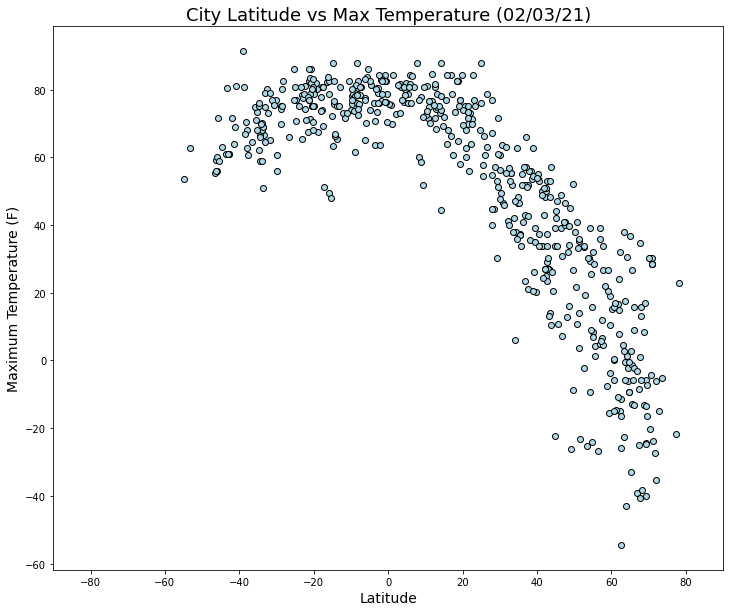

In [42]:
x_axis = city_data['Latitude']
y_axis = city_data['Max_temp']
plt.figure(figsize=(12, 10))
plt.xlim(-90, 90)
plt.scatter(x_axis, y_axis, c='lightblue', marker='o', edgecolor='black')
plt.xlabel("Latitude", fontsize=14)
plt.ylabel("Maximum Temperature (F)", fontsize=14)
plt.title("City Latitude vs Max Temperature (" + date_run + ')', fontsize=18)
plt.savefig("../Images/lat_vs_temp.png")
plt.show()

The closer the city is to the equator, the hotter it is.

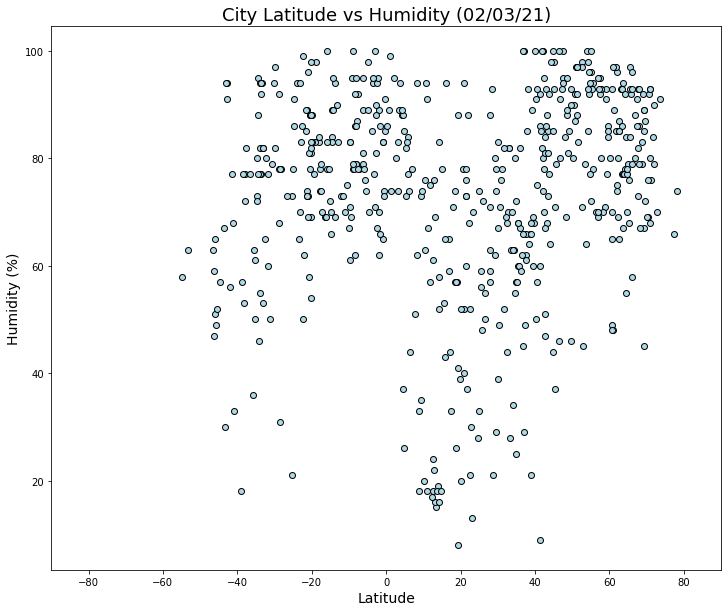

In [43]:
x_axis = city_data['Latitude']
y_axis = city_data['Humidity']
plt.figure(figsize=(12, 10))
plt.xlim(-90, 90)
plt.scatter(x_axis, y_axis, c='lightblue', marker='o', edgecolor='black')
plt.xlabel("Latitude", fontsize=14)
plt.ylabel("Humidity (%)", fontsize=14)
plt.title("City Latitude vs Humidity (" + date_run + ')', fontsize=18)
plt.savefig("../Images/lat_vs_humid.png")
plt.show()

There is not much of a correlation between humidity and the equator.

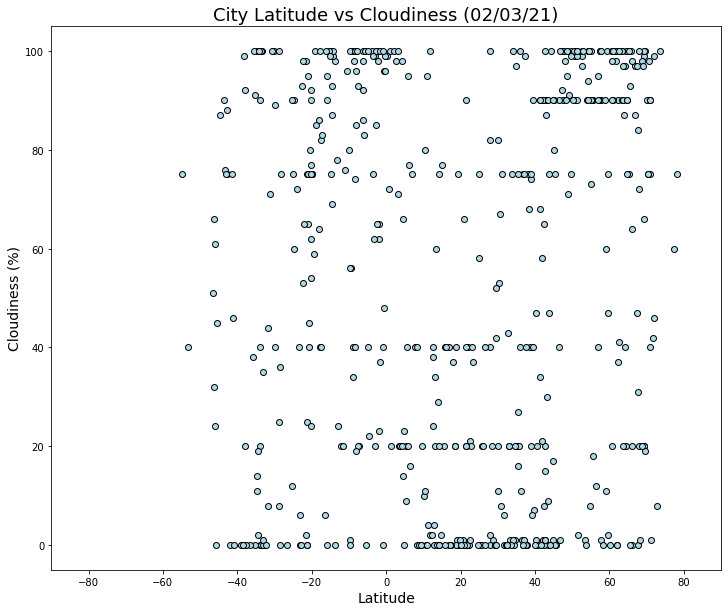

In [44]:
x_axis = city_data['Latitude']
y_axis = city_data['Clouds']
plt.figure(figsize=(12, 10))
plt.xlim(-90, 90)
plt.scatter(x_axis, y_axis, c='lightblue', marker='o', edgecolor='black')
plt.xlabel("Latitude", fontsize=14)
plt.ylabel("Cloudiness (%)", fontsize=14)
plt.title("City Latitude vs Cloudiness (" + date_run + ')', fontsize=18)
plt.savefig("../Images/lat_vs_cloud.png")
plt.show()

There seems to be no correlation between location of the city and cloudiness.

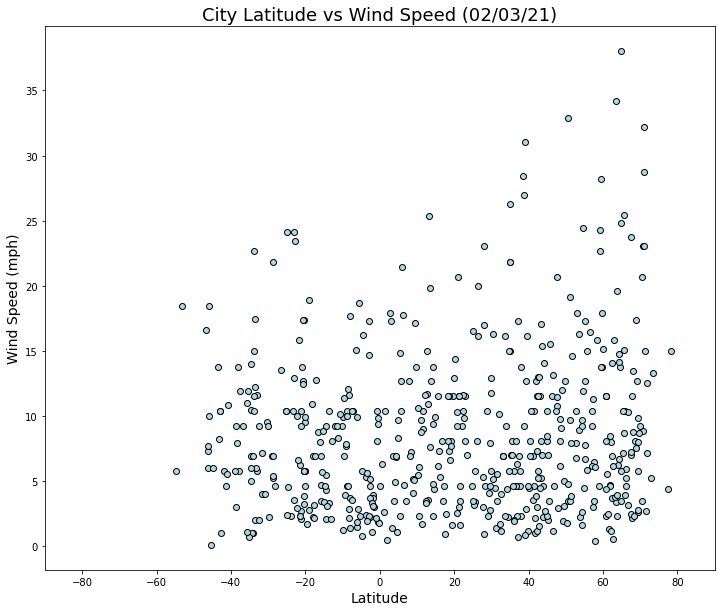

In [45]:
x_axis = city_data['Latitude']
y_axis = city_data['Wind_speed']
plt.figure(figsize=(12, 10))
plt.xlim(-90, 90)
plt.scatter(x_axis, y_axis, c='lightblue', marker='o', edgecolor='black')
plt.xlabel("Latitude", fontsize=14)
plt.ylabel("Wind Speed (mph)", fontsize=14)
plt.title("City Latitude vs Wind Speed (" + date_run + ')', fontsize=18)
plt.savefig("../Images/lat_vs_wind.png")
plt.show()

The majority of the wind speeds are below 15mph and there seems to be no relationship between wind speeds and location of the city.

In [46]:
northern_hem = city_data.loc[city_data['Latitude']> 0]
northern_hem.head()

,City,Latitude,Longitude,Max_temp,Humidity,Clouds,Wind_speed,Country,Date
0,kapaa,22.0752,-159.3190,73.00,88,40,9.22,US,1612392712
1,yellowknife,62.4560,-114.3525,-15.00,69,90,6.91,CA,1612392485
2,clinton,42.5870,-82.9199,37.40,51,20,5.75,US,1612392517
5,khatanga,71.9667,102.5000,-6.16,90,99,12.53,RU,1612392712
6,nikolskoye,59.7035,30.7861,19.00,86,75,17.90,RU,1612392712


In [47]:
southern_hem = city_data.loc[city_data['Latitude']< 0]
southern_hem.head()

,City,Latitude,Longitude,Max_temp,Humidity,Clouds,Wind_speed,Country,Date
3,hobart,-42.8794,147.3294,61.00,94,75,10.36,AU,1612392712
4,vaini,-21.2000,-175.2000,82.40,89,75,10.36,TO,1612392712
8,mucuri,-18.0864,-39.5508,77.85,83,64,10.94,BR,1612392518
9,puerto ayora,-0.7393,-90.3518,84.20,65,0,10.36,EC,1612392713
12,dunedin,-45.8742,170.5036,55.99,65,61,10.00,NZ,1612392713


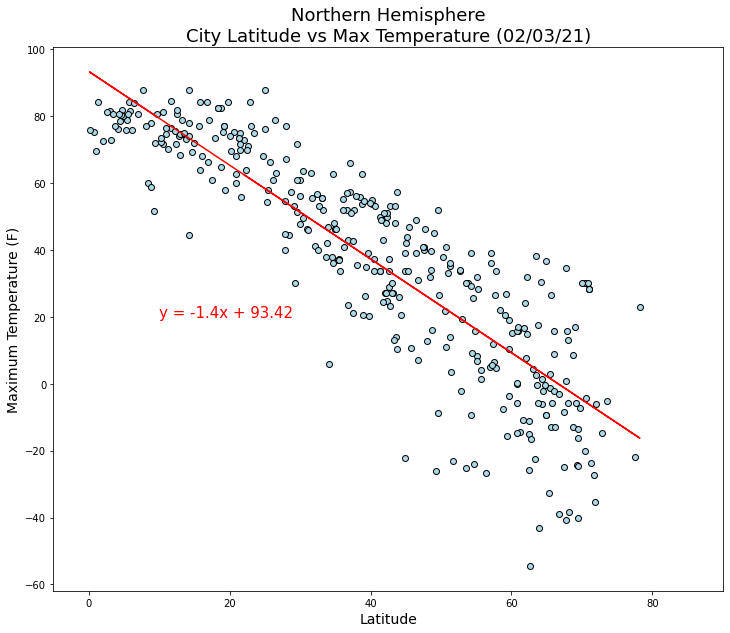

The r value is: -0.87.


In [48]:
x_axis = northern_hem['Latitude']
y_axis = northern_hem['Max_temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.figure(figsize=(12, 10))
plt.xlim(-5, 90)
plt.scatter(x_axis, y_axis, c='lightblue', marker='o', edgecolor='black')
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(10,20),fontsize=15,color="red")
plt.xlabel("Latitude", fontsize=14)
plt.ylabel("Maximum Temperature (F)", fontsize=14)
plt.title("Northern Hemisphere\nCity Latitude vs Max Temperature (" + date_run + ')', fontsize=18)
plt.savefig("../Images/lat_vs_temp_north.png")
plt.show()

correlation = st.pearsonr(x_axis,y_axis)
print(f"The r value is: {round(correlation[0],2)}.")

There is an almost perfect negative correlation between max temp and latitude in the Northern Hemisphere. So when the latitude numbers go up, the temperature goes down.

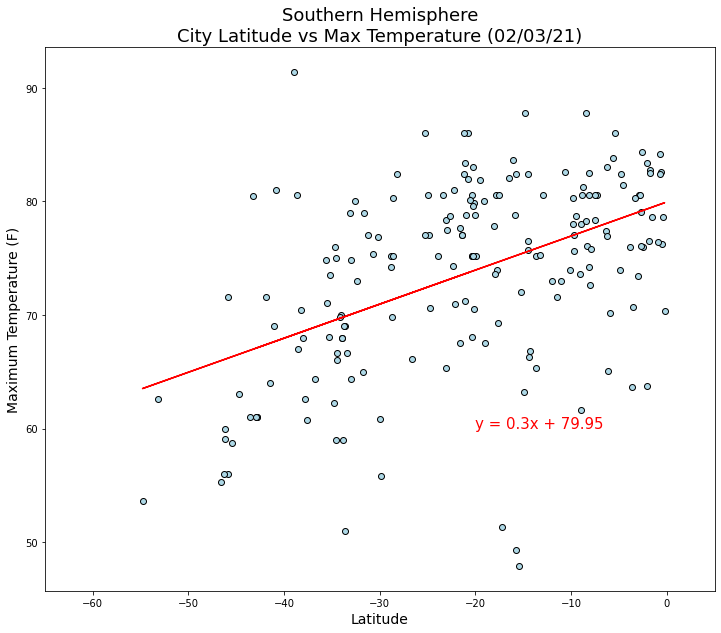

The r value is: 0.48.


In [49]:
x_axis = southern_hem['Latitude']
y_axis = southern_hem['Max_temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.figure(figsize=(12, 10))
plt.xlim(-65, 5)
plt.scatter(x_axis, y_axis, c='lightblue', marker='o', edgecolor='black')
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(-20, 60),fontsize=15,color="red")
plt.xlabel("Latitude", fontsize=14)
plt.ylabel("Maximum Temperature (F)", fontsize=14)
plt.title("Southern Hemisphere\nCity Latitude vs Max Temperature (" + date_run + ')', fontsize=18)
plt.savefig("../Images/lat_vs_temp_south.png")
plt.show()

correlation = st.pearsonr(x_axis,y_axis)
print(f"The r value is: {round(correlation[0],2)}.")


Contrary to the Northern Hemisphere, the Southern Hemisphere has a positive correlation between the temperature and latitude. So as the latitude increases, the temperature increases.

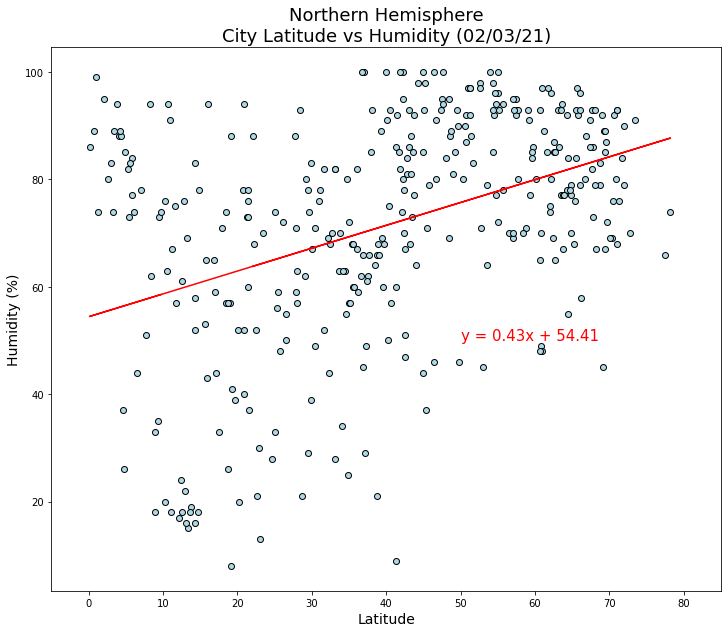

The r value is: 0.4.


In [50]:
x_axis = northern_hem['Latitude']
y_axis = northern_hem['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.figure(figsize=(12, 10))
plt.xlim(-5, 85)
plt.scatter(x_axis, y_axis, c='lightblue', marker='o', edgecolor='black')
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(50, 50),fontsize=15,color="red")
plt.xlabel("Latitude", fontsize=14)
plt.ylabel("Humidity (%)", fontsize=14)
plt.title("Northern Hemisphere\nCity Latitude vs Humidity (" + date_run + ')', fontsize=18)
plt.savefig("../Images/lat_vs_humid_north.png")
plt.show()

correlation = st.pearsonr(x_axis,y_axis)
print(f"The r value is: {round(correlation[0],2)}.")

In the Northern Hemisphere, there is a positive correlation between humidity and latitude. The correlation coefficient is low, so latitude is not a great indicator of whether or not the city would be humid.

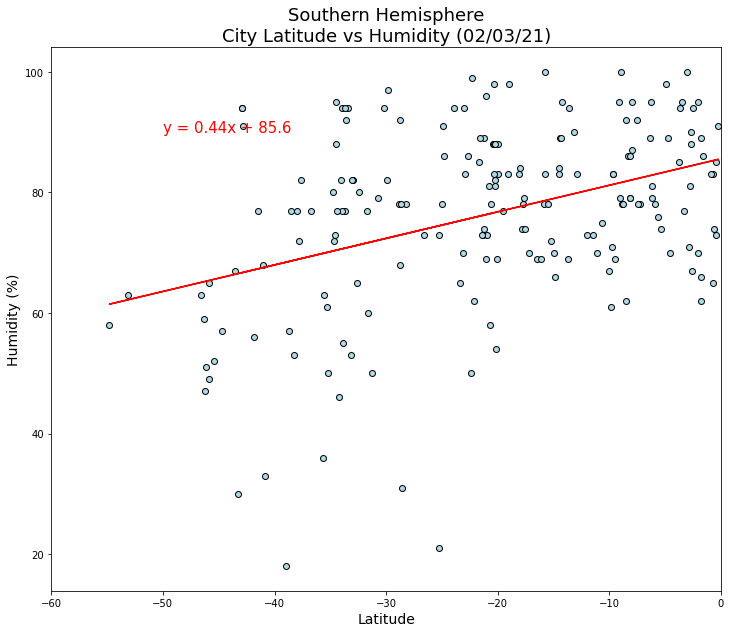

The r value is: 0.39.


In [51]:
x_axis = southern_hem['Latitude']
y_axis = southern_hem['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.figure(figsize=(12, 10))
plt.xlim(-60, 0)
plt.scatter(x_axis, y_axis, c='lightblue', marker='o', edgecolor='black')
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(-50, 90),fontsize=15,color="red")
plt.xlabel("Latitude", fontsize=14)
plt.ylabel("Humidity (%)", fontsize=14)
plt.title("Southern Hemisphere\nCity Latitude vs Humidity (" + date_run + ')', fontsize=18)
plt.savefig("../Images/lat_vs_humid_south.png")
plt.show()

correlation = st.pearsonr(x_axis,y_axis)
print(f"The r value is: {round(correlation[0],2)}.")

In the Southern Hemisphere, there is also a positive correlation between humidity and latitude. The correlation coefficient is low, so latitude is not a great indicator of whether or not the city would be humid.

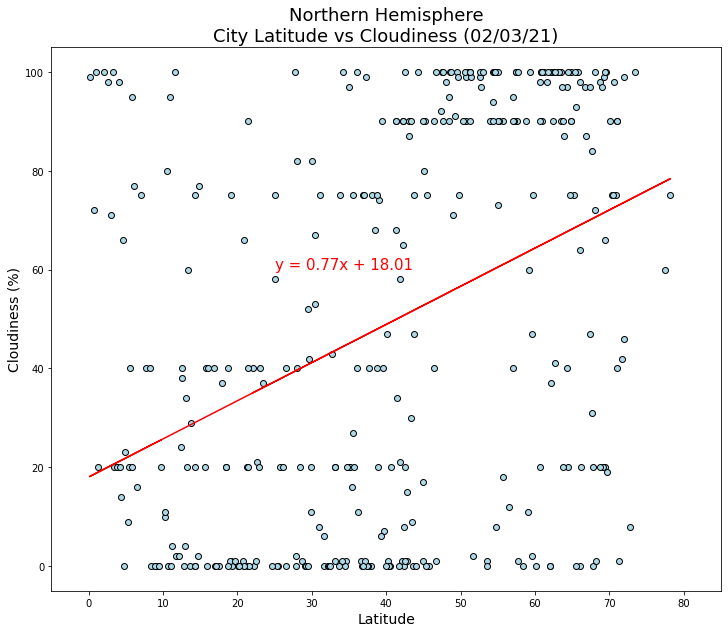

The r value is: 0.39.


In [52]:
x_axis = northern_hem['Latitude']
y_axis = northern_hem['Clouds']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.figure(figsize=(12, 10))
plt.xlim(-5, 85)
plt.scatter(x_axis, y_axis, c='lightblue', marker='o', edgecolor='black')
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(25, 60),fontsize=15,color="red")
plt.xlabel("Latitude", fontsize=14)
plt.ylabel("Cloudiness (%)", fontsize=14)
plt.title("Northern Hemisphere\nCity Latitude vs Cloudiness (" + date_run + ')', fontsize=18)
plt.savefig("../Images/lat_vs_cloud_north.png")
plt.show()

correlation = st.pearsonr(x_axis,y_axis)
print(f"The r value is: {round(correlation[0],2)}.")

Although there is a positive correlation between cloudiness and latitude using the Pearson R equation, the chart looks as more random with no correlation. The difference could be explained by the fact that there a many cities with 0% clouds and 100% clouds.

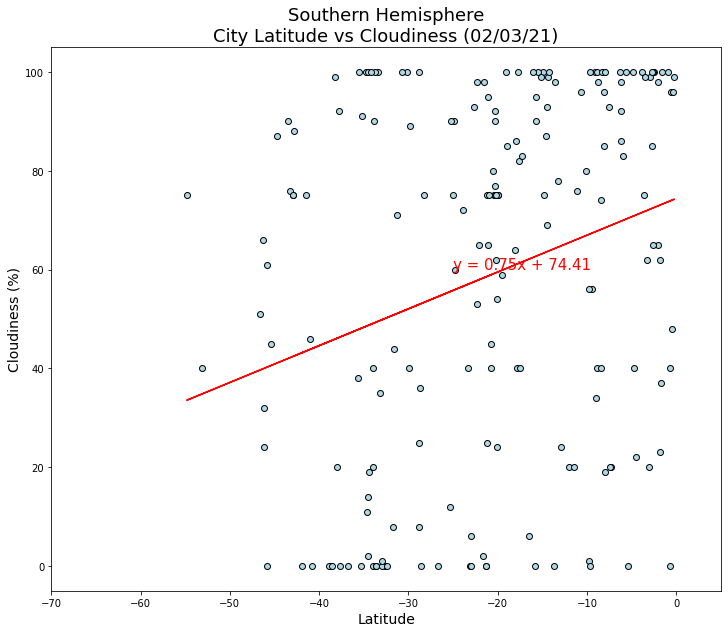

The r value is: 0.27.


In [53]:
x_axis = southern_hem['Latitude']
y_axis = southern_hem['Clouds']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.figure(figsize=(12, 10))
plt.xlim(-70, 5)
plt.scatter(x_axis, y_axis, c='lightblue', marker='o', edgecolor='black')
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(-25, 60),fontsize=15,color="red")
plt.xlabel("Latitude", fontsize=14)
plt.ylabel("Cloudiness (%)", fontsize=14)
plt.title("Southern Hemisphere\nCity Latitude vs Cloudiness (" + date_run + ')', fontsize=18)
plt.savefig("../Images/lat_vs_cloud_south.png")
plt.show()

correlation = st.pearsonr(x_axis,y_axis)
print(f"The r value is: {round(correlation[0],2)}.")

The Southern Hemisphere shows more of a no correlated relationship in both qualitative and quantitative values.

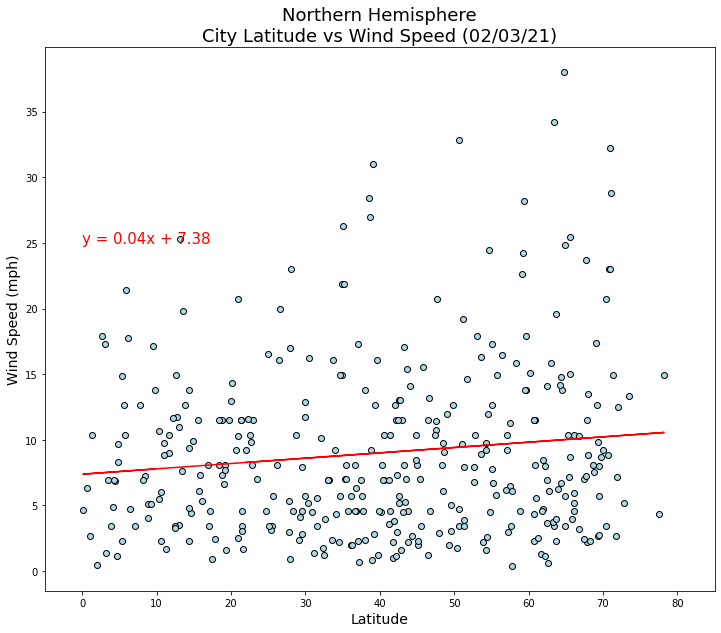

The r value is: 0.13.


In [54]:
x_axis = northern_hem['Latitude']
y_axis = northern_hem['Wind_speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.figure(figsize=(12, 10))
plt.xlim(-5, 85)
plt.scatter(x_axis, y_axis, c='lightblue', marker='o', edgecolor='black')
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(0, 25),fontsize=15,color="red")
plt.xlabel("Latitude", fontsize=14)
plt.ylabel("Wind Speed (mph)", fontsize=14)
plt.title("Northern Hemisphere\nCity Latitude vs Wind Speed (" + date_run + ')', fontsize=18)
plt.savefig("../Images/lat_vs_wind_north.png")
plt.show()

correlation = st.pearsonr(x_axis,y_axis)
print(f"The r value is: {round(correlation[0],2)}.")

There is also a very small correlation between wind speed and latitude in the Northern Hemisphere. This means that no matter where the city is, the wind could potentially be any speed. You could argue, however, that the further the city is from the Equator, the fast the wind will blow.

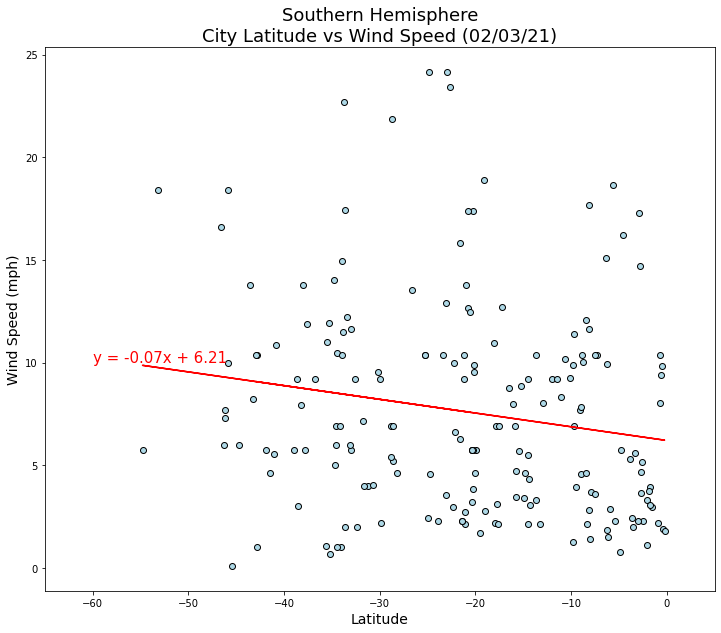

The r value is: -0.17.


In [55]:
x_axis = southern_hem['Latitude']
y_axis = southern_hem['Wind_speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.figure(figsize=(12, 10))
plt.xlim(-65, 5)
plt.scatter(x_axis, y_axis, c='lightblue', marker='o', edgecolor='black')
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(-60, 10),fontsize=15,color="red")
plt.xlabel("Latitude", fontsize=14)
plt.ylabel("Wind Speed (mph)", fontsize=14)
plt.title("Southern Hemisphere\nCity Latitude vs Wind Speed (" + date_run + ')', fontsize=18)
plt.savefig("../Images/lat_vs_wind_south.png")
plt.show()

correlation = st.pearsonr(x_axis,y_axis)
print(f"The r value is: {round(correlation[0],2)}.")

There does seem to be more of a correlation between the wind speed and latitude in the Southern Hemisphere. It is a negative correlation so the wind tends to speed up the further it gets from the Equator. The correlation is low so its not a great indicator of wind speed. Based on this plot and the Northern Hemisphere plot, you can conclude that there isn't very fast wind around the Equator.